In [1]:
import polars as pl
pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(-1)

import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys
sys.path.append('../')

from exp.features import Features
from exp.models.cat import CatBoostModel
from exp.models._lgbm import LGBMModel
from exp.models.rf import RandomForestModel
from exp.models.rgf import RGFModel
from exp.models.xgb import XGBModel

import warnings
warnings.filterwarnings("ignore")

import gc
gc.enable()

/home/education/signate_scup2023/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train = pl.read_csv("../input/train.csv")
test = pl.read_csv("../input/test.csv")

In [3]:
from exp.features import FeatureSelecter


features = Features(train, test)
train, test = features.create_features()

selecter = FeatureSelecter(train, test)

In [4]:
selecter.get_dataframe("lgbm")[1].head(2)

year,cylinders,odometer,odometer_f,manufacturer_ref_val,age,odometer/age,odometer/cylinders,lat,lng,lat_scaled,lng_scaled,lat_lng_cluster,manufacturer_rank,condition_rank,fuel_rank,title_status_rank,transmission_rank,drive_rank,size_rank,type_rank,paint_color_rank,state_rank,manufacturer_count,condition_count,fuel_count,title_status_count,transmission_count,drive_count,size_count,type_count,paint_color_count,state_count,type_base_price,type_base_year,type_base_odometer_f,manufacturer_base_price,manufacturer_base_year,manufacturer_base_odometer_f,type_manufacturer_base_price,type_manufacturer_base_year,type_manufacturer_base_odometer,type_manufacturer_year_diff,type_manufacturer_odometer_diff,type_manufacturer_odometer/age_base,type_manufacturer_odometer/age_diff,manufacturer_price_mean,fuel_price_mean,title_status_price_mean,transmission_price_mean,drive_price_mean,type_price_mean,paint_color_price_mean,state_price_mean,lat_lng_cluster_price_mean,title_status_type_manufacturer_price_ratio_mean,state_type_manufacturer_price_ratio_mean,region_type_manufacturer_price_ratio_mean,paint_color_type_manufacturer_price_ratio_mean,lat_lng_cluster_type_manufacturer_price_ratio_mean,condition_l,size_l,manufacturer_age_mean,manufacturer_age_std,manufacturer_age_max,manufacturer_age_min,manufacturer_age_diff,manufacturer_odometer_mean,manufacturer_odometer_std,manufacturer_odometer_max,manufacturer_odometer_min,manufacturer_odometer_diff,condition_age_mean,condition_age_std,condition_age_max,condition_age_min,condition_age_diff,condition_odometer_mean,condition_odometer_std,condition_odometer_max,condition_odometer_min,condition_odometer_diff,cylinders_age_mean,cylinders_age_std,cylinders_age_max,cylinders_age_min,cylinders_age_diff,cylinders_odometer_mean,cylinders_odometer_std,cylinders_odometer_max,cylinders_odometer_min,cylinders_odometer_diff,fuel_age_mean,fuel_age_std,fuel_age_max,fuel_age_min,fuel_age_diff,fuel_odometer_mean,fuel_odometer_std,fuel_odometer_max,fuel_odometer_min,fuel_odometer_diff,drive_age_mean,drive_age_std,drive_age_max,drive_age_min,drive_age_diff,drive_odometer_mean,drive_odometer_std,drive_odometer_max,drive_odometer_min,drive_odometer_diff,type_age_mean,type_age_std,type_age_max,type_age_min,type_age_diff,type_odometer_mean,type_odometer_std,type_odometer_max,type_odometer_min,type_odometer_diff,car_string_vec_norm2,car_string_vec_mean,car_string_vec_0,car_string_vec_1,car_string_vec_2,car_string_vec_3,car_string_vec_4,car_string_vec_5,car_string_vec_6,car_string_vec_7,car_string_vec_8,car_string_vec_9,car_string_vec_10,car_string_vec_11,car_string_vec_12,car_string_vec_13,car_string_vec_14,car_string_vec_15,car_string_vec_16,car_string_vec_17,car_string_vec_18,car_string_vec_19,car_string_vec_20,car_string_vec_21,car_string_vec_22,car_string_vec_23,car_string_vec_24,car_string_vec_25,car_string_vec_26,car_string_vec_27,car_string_vec_28,car_string_vec_29,car_string_vec_30,car_string_vec_31,car_string_vec_32,car_string_vec_33,car_string_vec_34,car_string_vec_35,car_string_vec_36,car_string_vec_37,car_string_vec_38,car_string_vec_39,car_string_vec_40,car_string_vec_41,car_string_vec_42,car_string_vec_43,car_string_vec_44,car_string_vec_45,car_string_vec_46,car_string_vec_47,car_string_vec_48,car_string_vec_49,car_string_vec_50,car_string_vec_51,car_string_vec_52,car_string_vec_53,car_string_vec_54,car_string_vec_55,car_string_vec_56,car_string_vec_57,car_string_vec_58,car_string_vec_59,car_string_vec_60,car_string_vec_61,car_string_vec_62,car_string_vec_63,car_string_vec_64,car_string_vec_65,car_string_vec_66,car_string_vec_67,car_string_vec_68,car_string_vec_69,car_string_vec_70,car_string_vec_71,car_string_vec_72,car_string_vec_73,car_string_vec_74,car_string_vec_75,car_string_vec_76,car_string_vec_77,car_string_vec_78,car_string_vec_79,car_string_vec_80,car_string_vec_81,car_string_vec_82,car_string_vec_83,car_string_vec_84,car_string_vec_85,car_string_vec_86,car_string_vec_87,car_string_vec_88,car_string_vec

In [6]:
predictions = pl.concat([train["price"].to_frame(), pl.DataFrame([None] * test.height, schema={"price": pl.Float64})])

In [7]:
lgbm = LGBMModel(*selecter.get_dataframe("lgbm"), seed=0)
#lgbm.objective(100)

In [8]:
lgbm.best_params = {
    'num_leaves': 41,
    'max_depth': 4,
    'min_child_samples': 65,
    'subsample': 0.1813266686908916,
    'colsample_bytree': 0.9997207808739403,
    'reg_alpha': 3.8163343968470076e-06,
    'reg_lambda': 9.185674902594394e-05,
    'feature_fraction': 0.5180973927754882,
    'bagging_fraction': 0.8804646505719466,
    'bagging_freq': 1
}
lgbm_predictions = lgbm.predict(5)
predictions = pl.concat([predictions, lgbm_predictions], how="horizontal")

Fold_lgbm 0: 0.4388236895316769
Fold_lgbm 1: 0.44472280973163864
Fold_lgbm 2: 0.44849869750648846
Fold_lgbm 3: 0.4457113572486314
Fold_lgbm 4: 0.44844548270489637
CV_lgbm: 0.44524040734466636


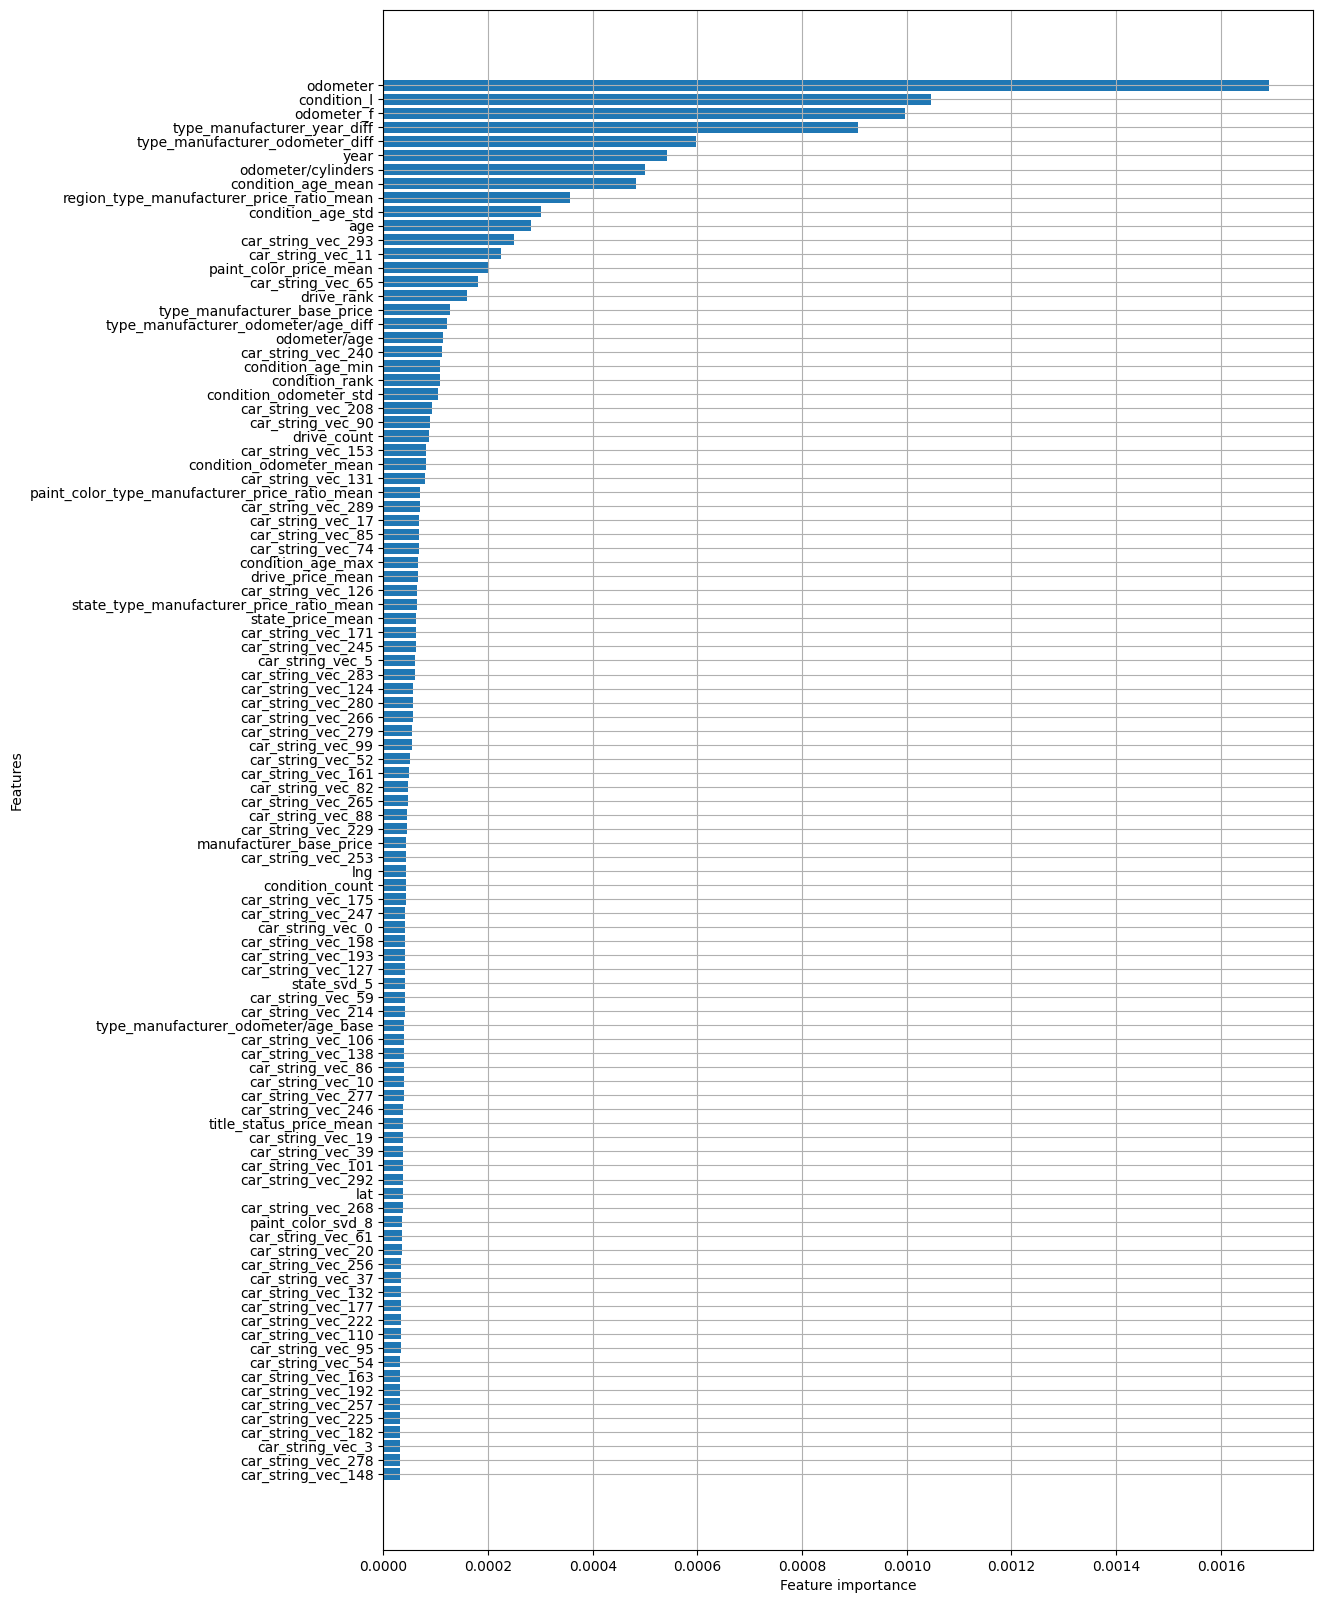

In [13]:
importance = lgbm.feature_importance()
importance = importance.sort(by='lgbm_importance_mean')
importance = importance.tail(100)
#グラフ表示
plt.figure(figsize=(12, 20))
plt.barh(importance["feature"], importance["lgbm_importance_mean"])
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.grid()
plt.show()

In [ ]:
#xgb = XGBModel(train, test)
#xgb.objective(20)
#xgb.best_params = {'n_estimators': 767, 'max_depth': 8, 'lambda': 1.2306916748991704e-06, 'alpha': 0.018078104089246788, 'colsample_bytree': 0.42319770953022684, 'subsample': 0.2810517802368746, 'min_child_weight': 218, 'gamma': 6.031109467976734e-08, 'eta': 0.018889170085640027}
#xgb_predictions = xgb.predict()
#predictions = pl.concat([predictions, xgb_predictions], how="horizontal")

In [ ]:
#rf = RandomForestModel(df)
##rf.objective(5)
#rf.best_params = {'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 14, 'max_features': 0.6306125661502896, 'max_leaf_nodes': 18, 'n_estimators': 8762, 'bootstrap': True}
#rf_predictions = rf.predict()
#predictions = pd.concat([predictions, rf_predictions], axis=1)

In [ ]:
#rgf = RGFModel(df)
##rgf.objective(5)
#rgf.best_params = {'max_leaf': 8072, 'algorithm': 'RGF_Opt', 'test_interval': 142, 'min_samples_leaf': 11, 'reg_depth': 9, 'l2': 0.0002082492344277923, 'sl2': 4.2919223241162815e-07, 'normalize': False}
#rgf_predictions = rgf.predict()
#predictions = pd.concat([predictions, rgf_predictions], axis=1)

In [ ]:
#cat = CatBoostModel(df)
##cat.objective(5)
#cat.best_params = {"depth": 6}
#cat_predictions = cat.predict()
#predictions = pd.concat([predictions, cat_predictions], axis=1)

In [ ]:
predictions.head()

In [ ]:
#model = Ridge(random_state=0)
#train = predictions[predictions["price"].notnull()]
#test = predictions[predictions["price"].isnull()]
#X_train = train.drop(["price"], axis=1)
#y_train = train["price"]
#X_test = test.drop(["price"], axis=1)
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

In [ ]:
y_pred = lgbm_predictions.mean(axis=1)[train.height:].to_list()

In [ ]:
#sub = pl.read_csv(os.path.join(os.path.dirname(__file__), "../input/submit_sample.csv"), has_header=False, new_columns=["id", "price"])
#sub = sub.with_columns(pl.Series("", y_pred).alias("price"))
#sub.write_csv(os.path.join(os.path.dirname(__file__), "../output/submission_te0810_3.csv"), has_header=False)